# New York CitiBike Data Analysis
## by Saurabh Kumar

## Investigation Overview
In this presentation, I will Focus on:
1. the usage of Citi Bike based on different months, days and time of day. 
2. usage based user type and Gender
## Dataset Overview
I have identified the import features in exploratory analysis, so I will be bring important features in Explanatory Analysis. This data set consist of 19884919 rows and 13 columns. PLEASE NOTE beacuse of performance issue for some graphs I am using Sample of 100000 records.

<a href="https://www.citibikenyc.com/">Citibike</a>  is a privately owned public bicycle sharing system serving the New York City boroughs of the Bronx, Brooklyn, Manhattan, and Queens, as well as Jersey City, New Jersey. It is operated by Motivate (formerly Alta Bicycle Share), with former Metropolitan Transportation Authority CEO Jay Walder as chief executive until September 30th, 2018, when the company was acquired by Lyft. Citi Bike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Ny_2019_master_distance_cleaned.csv')

In [3]:
#Checking the shape of dataset to see all datset is imported
df.shape

(19884919, 23)

In [4]:
# As noticed in exploratory. Changing start date to dattime format using pandas .astype function
df['start_date'] = df['start_date'].astype('datetime64')

In [5]:
# changing data type of start_station_id, end_station_id, bikeid,  to string and usertype, gender to category using astype function
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bikeid'] = df['bikeid'].astype('str')

df['usertype'] = df['usertype'].astype('category')
df['gender'] = df['gender'].astype('category')

In [6]:
# Creating a column list identified as important features
columns = ['bikeid','start_station_name', 'end_station_name','start_date', 'month', 'day', 'start_hourofday','usertype','gender','user_age','distance_miles', 'duration_minutes', 'speed']

In [7]:
# Creating a list for weekdays and month to include it further analysis for ordering charts
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cats_mth = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']

In [8]:
# Including important column as mentioned above into new dataframe
df_analysis = df[columns]

In [9]:
# Veryfying if entire data set from above code is imported
df_analysis.shape

(19884919, 13)

In [10]:
# creating a dataframe named df_sample from randomly selected records using . sample function
df_sample = df_analysis.sample(100000)

## Insight 1:
> Not surprisingly, the summer months and fall are the most popular times to use the Citi Bike sharing system in New York. September (Fall Foliage) is the most popular month, with August as the second most popular, and June/July coming in closely as the third most popular months to use the bike system. The weather in New York is best in the Fall and usually stays sunny until returning to its usual foggy weather in the late fall/early winter months. (Refer to 1-A, 1-B)

## 1 - A : Bike Trip by Start Date


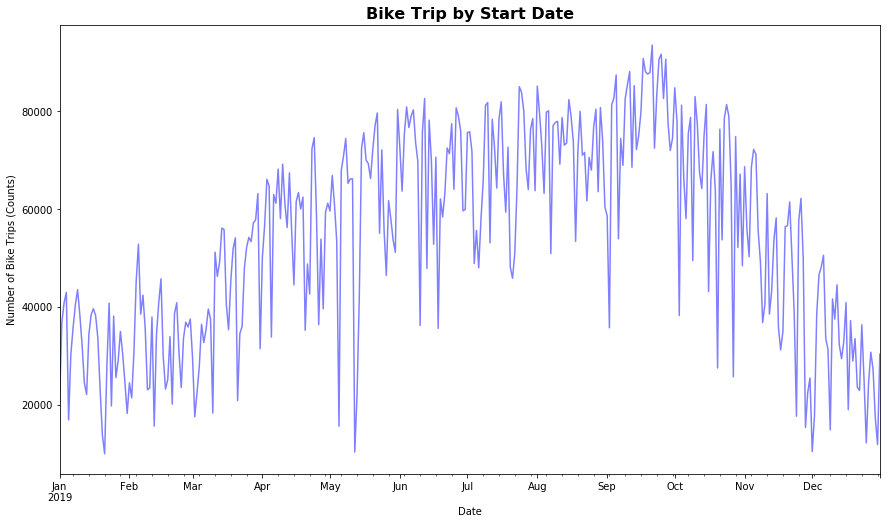

In [29]:
# creating trend graph for Bike Trip
plt.figure(figsize=[14.70, 8.27])
df_analysis.groupby('start_date')['bikeid'].count().plot(kind ='line', color = 'blue', alpha =.5)
plt.xlabel('Date');
plt.ylabel('Number of Bike Trips (Counts)')
plt.title('Bike Trip by Start Date',fontsize = 16, fontweight = 'bold');

## 1 - B: Bike Trip by Months

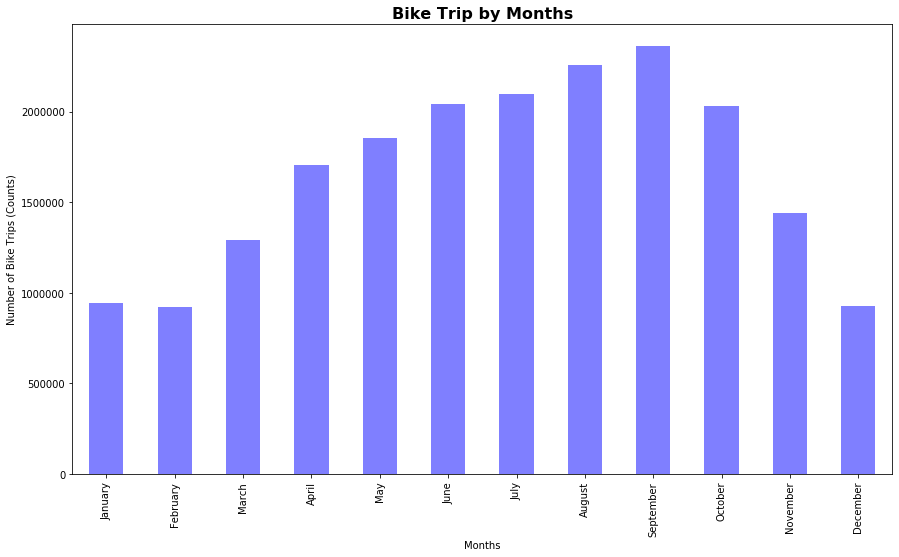

In [30]:
# creating bar chart for numbe rof bike used by months
plt.figure(figsize=[14.70, 8.27])
df_analysis.groupby('month')['bikeid'].count().reindex(cats_mth).plot(kind ='bar', color = 'blue', alpha=.5)
plt.xlabel('Months');
plt.ylabel('Number of Bike Trips (Counts)')
plt.title('Bike Trip by Months',fontsize = 16, fontweight = 'bold');

## Insight 2: 
> Citi Bike usage is very high on Weekdays as compared to weekends. And the usage usally at peak from 7 am to 9 am and 5 pm to 7 pm on weekdays, this signify that most of the users use citi bike for office commute in New York. (Refer to 2A, 2B)

## 2 - A: Users by Day



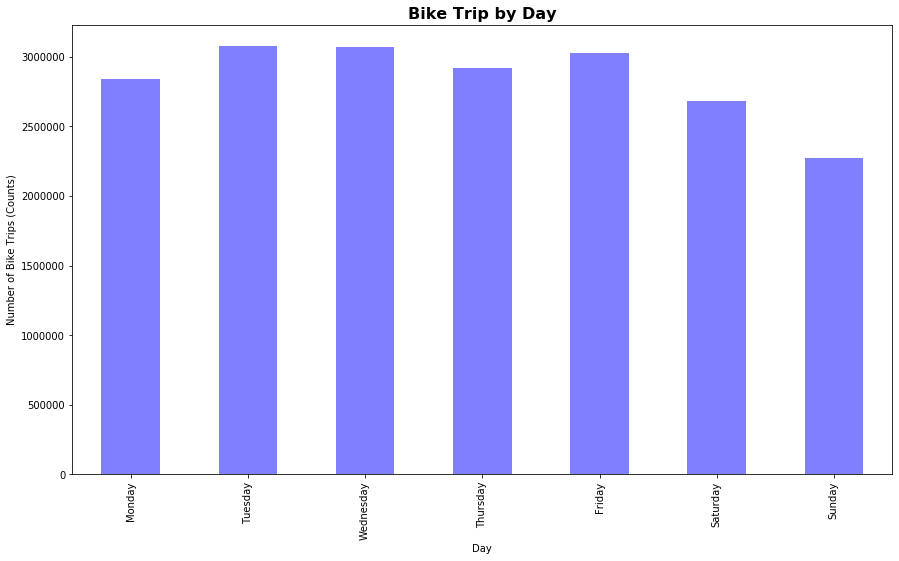

In [31]:
# creating bar chart for numbe rof bike used by days
plt.figure(figsize=[14.70, 8.27])
df_analysis.groupby('day')['bikeid'].count().reindex(cats).plot(kind ='bar',color = 'blue', alpha =.5)
plt.xlabel('Day');
plt.ylabel('Number of Bike Trips (Counts)')
plt.title('Bike Trip by Day',fontsize = 16, fontweight = 'bold');

## 2 - B: Users by Hour of Day

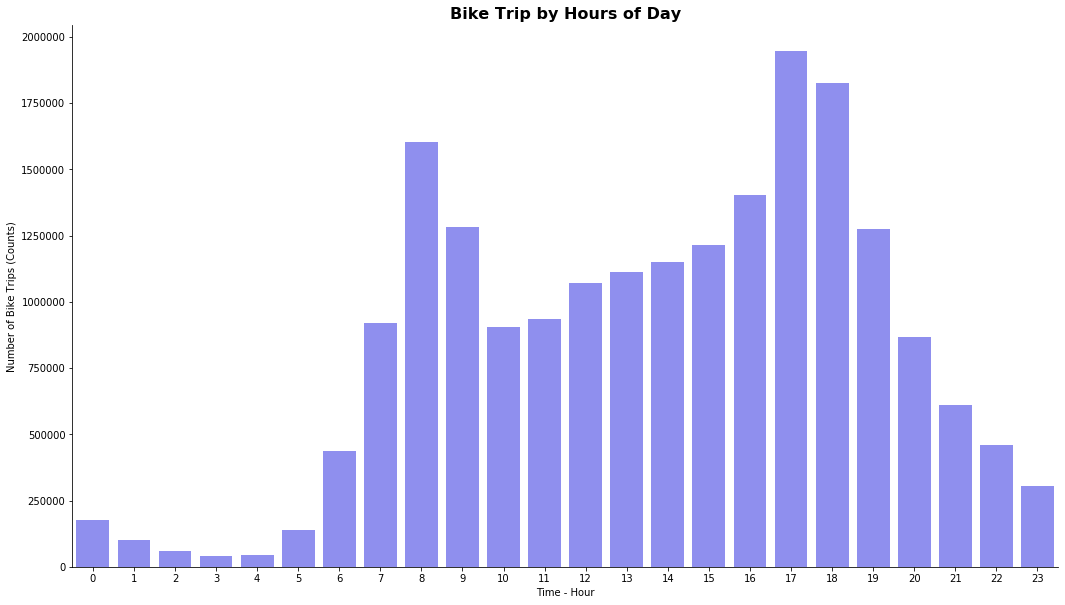

In [32]:
# creating bar chart for numbe rof bike used by Hours of day
sb.catplot(data = df_analysis, x='start_hourofday', kind='count', color="blue", alpha=.5, height = 8.27, aspect = 14.70/8.27)
plt.xlabel('Time - Hour');
plt.ylabel('Number of Bike Trips (Counts)')
plt.title('Bike Trip by Hours of Day',fontsize = 16, fontweight = 'bold');

## Insight 3:
> Most of the users who are mainly using Citi Bike for office commute seems to be subscribers, while other users who are customers mainly use it on Weekends between 10 am to 7 pm.

## 3 : Customers and Subscribers by Day and Hour

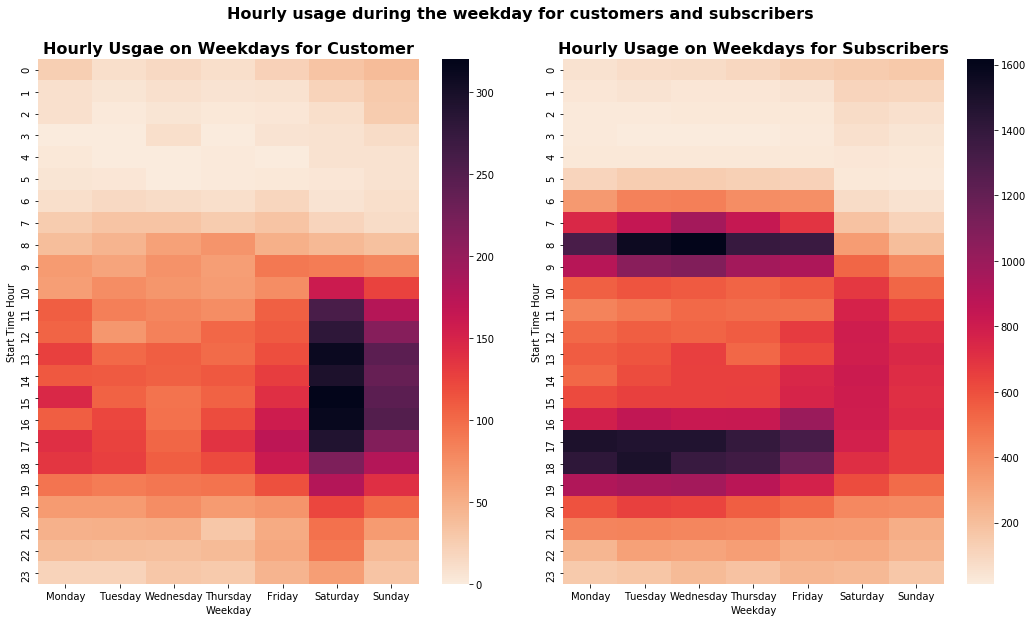

In [22]:
# Creating heatmap for user types by Hourly Usage on Weekdays

df_sample['day'] = pd.Categorical(df_sample['day'], 
                                                categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                                ordered=True)
plt.figure(figsize=(14.70,8.27));


# heatmap for customers
plt.subplot(1, 2, 1);
df_customer = df_sample.query('usertype == "Customer"').groupby(["start_hourofday", "day"])["bikeid"].size().reset_index()
df_customer = df_customer.pivot("start_hourofday", "day", "bikeid")
ax = sb.heatmap(df_customer, cmap="rocket_r")

plt.title("Hourly Usgae on Weekdays for Customer", fontsize = 16, fontweight = 'bold');
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')
plt.xticks(rotation=0);


# heatmap for Subscribers
plt.subplot(1, 2, 2);
df_customer = df_sample.query('usertype == "Subscriber"').groupby(["start_hourofday", "day"])["bikeid"].size().reset_index()
df_customer = df_customer.pivot("start_hourofday", "day", "bikeid")
sb.heatmap(df_customer, cmap="rocket_r")

plt.title("Hourly Usage on Weekdays for Subscribers", fontsize = 16, fontweight = 'bold');
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')
plt.xticks(rotation=0);

plt.suptitle('Hourly usage during the weekday for customers and subscribers', y = 1.04, fontsize=16, weight='semibold')
plt.tight_layout()

## Insight 4:

> Subscribers are younger than Customer for Citi Bike Data and have a small inter quartile range also. The median age for subscriber is 35 while for customers is 42 approx

## 4 : User Age by User Type

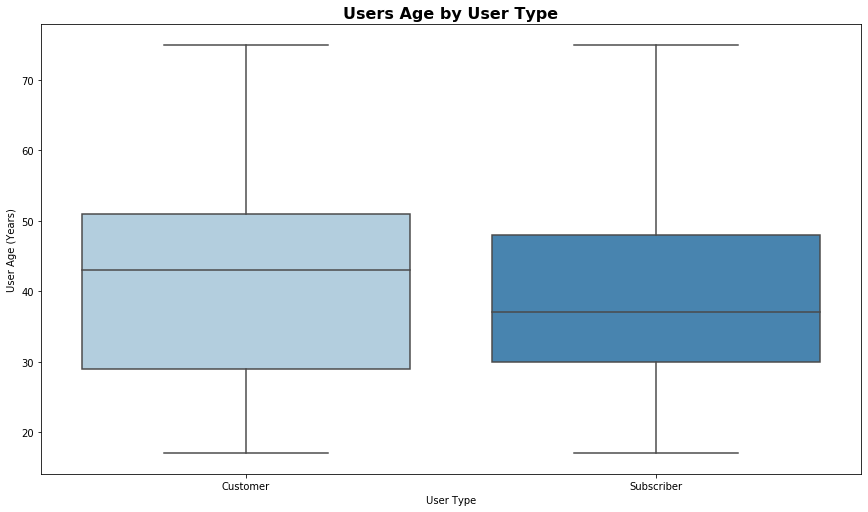

In [33]:
# creating boxplot for user's age by user types
plt.figure(figsize=[14.70, 8.27])
sb.boxplot(data=df_analysis, x='usertype', y='user_age', palette='Blues');
plt.xlabel('User Type');
plt.ylabel('User Age (Years)')
plt.title('Users Age by User Type',fontsize = 16, fontweight = 'bold');

## Insight 5:

> Most of the users are Male as compared to Female. Male user are approx 45% more than Female users

## 5 : User Type by Gender

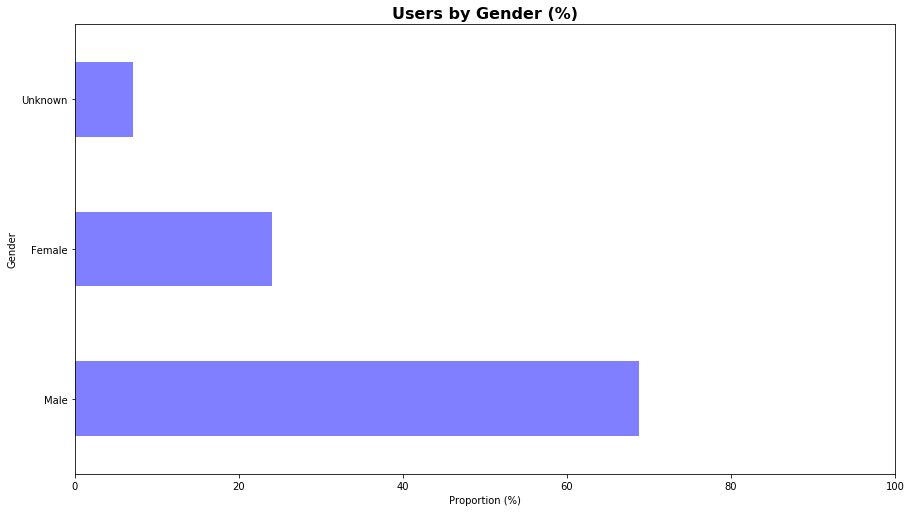

In [35]:
# creating bar graph to see Gender proportion
plt.figure(figsize=[14.70, 8.27])
(df_analysis['gender'].value_counts(normalize=True)*100).plot(kind='barh', color = 'blue', alpha = .5)
plt.xlabel('Proportion (%)')
plt.ylabel('Gender')
plt.title('Users by Gender (%)',fontsize = 16, fontweight = 'bold');
plt.xlim(0,100);